In [75]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [3]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# San Diego Air Quality
`sdapcd.org-o3pm25-1.1.1` Last Update: 2020-05-06T23:01:09

_Seven years of hourly data from a set of air pollution monitors in San Diego County_


Home page:  https://www.sdapcd.org/content/sdc/apcd/en/CurrentAirQuality.html

Data: http://jtimmer.cts.com/2015/Apr15/
## Documentation Links

* [pollutants](https://www.sdapcd.org/content/dam/sdc/apcd/PDF/Misc/APCD_Pollutant_Data_Definitions.pdf) Data definitions
* [homepage](https://www.sdapcd.org/content/sdc/apcd/en/CurrentAirQuality.html) Data home page
* [downloads](http://jtimmer.cts.com) Web directory of files

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [daily_pollution](data/daily_pollution.csv)**. Air pollution daily summary records
* ** [hourly_pollution](data/hourly_pollution.csv)**. Air pollution hourly records

In [176]:
pol = pkg.resource('hourly_pollution').dataframe()

# Remap duplicate parameters that have slightly different names
p_map = {}
pn_map = {}
for c in pol.parameter.unique():
    try:
        n,t,*_ = c.split(' ')
    except:
        print("Can't process parameter: ", c)
        continue
    new_val = f"{n}_{t}"
    if n not in pn_map:
        pn_map[n] = new_val
        
    p_map[c] = pn_map[n]

pol['parameter'] = pol.parameter.replace(p_map)

pol = pol.set_index(['date', 'sitename','parameter'])['value'].unstack()



Can't process parameter:  RAINFALL
Can't process parameter:  11_CoPM2.5


In [177]:
pol.head()

parameter            01_OZONE  02_NOX  03_NO2  04_NO  06_CO  10_INTMP  \
date       sitename                                                     
2013-07-10 ALPINE       0.022   0.011   0.011    0.0    NaN      24.0   
           CHULA_VI     0.035   0.002   0.002    0.0    NaN      24.0   
           DEL_MAR      0.034     NaN     NaN    NaN    NaN      25.0   
           DOWNTOWN     0.029     NaN     NaN    NaN    0.2      24.0   
           EL_CAJON     0.024   0.008   0.008    0.0    NaN      25.0   

parameter            11_CoPM2.5  11_PM2.5  12_VWDR  13_SIGTHETA  ...  \
date       sitename                                              ...   
2013-07-10 ALPINE           NaN       9.0      3.0         38.0  ...   
           CHULA_VI         NaN       NaN    257.0         50.0  ...   
           DEL_MAR          NaN       NaN    285.0         24.0  ...   
           DOWNTOWN         NaN      10.0    220.0         35.0  ...   
           EL_CAJON         NaN       8.0    222.0         39.0  ...   

parameter            17_RELHUM  18_PRES  19_SOLAR  25_NOY  26_NOY-NO  27_NO  \
date       sitename                                                           
2013-07-10 ALPINE         61.0      NaN       NaN     NaN        NaN    NaN   
           CHULA_VI        NaN      NaN       NaN     NaN        NaN    NaN   
           DEL_MAR         NaN      NaN       NaN     NaN        NaN    NaN   
           DOWNTOWN        NaN      NaN       NaN     NaN        NaN    NaN   
           EL_CAJON       76.0      NaN       NaN     9.1        9.0    0.0   

parameter            28_SO2  29_CO  BCarbon_ug/m3  RAINFALL  
date       sitename                                          
2013-07-10 ALPINE       NaN    NaN            NaN       NaN  
           CHULA_VI     NaN    NaN            NaN       NaN  
           DEL_MAR      NaN    NaN            NaN       NaN  
           DOWNTOWN     NaN    NaN            NaN       NaN  
           EL_CAJON     0.1  196.9            NaN       NaN  

[5 rows x 23 columns]

In [199]:
g = pol.reset_index().set_index('date').groupby('sitename')
g = dict(list(g))


parameter,sitename,01_OZONE,02_NOX,03_NO2,04_NO,06_CO,10_INTMP,11_CoPM2.5,11_PM2.5,12_VWDR,...,17_RELHUM,18_PRES,19_SOLAR,25_NOY,26_NOY-NO,27_NO,28_SO2,29_CO,BCarbon_ug/m3,RAINFALL
date,,,,,,,,,,,,,,,,,,,,,
2013-07-10 00:00:00,ALPINE,0.022,0.011,0.011,0.0,NaN,24.0,NaN,9.0,3.0,...,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-10 01:00:00,ALPINE,0.023,0.010,0.010,0.0,NaN,24.0,NaN,12.0,259.0,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-10 02:00:00,ALPINE,0.022,0.010,0.010,0.0,NaN,24.0,NaN,11.0,171.0,...,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-10 03:00:00,ALPINE,NaN,NaN,NaN,NaN,NaN,24.0,NaN,15.0,353.0,...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-10 04:00:00,ALPINE,0.025,0.008,0.008,0.0,NaN,24.0,NaN,16.0,339.0,...,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-05 19:00:00,ALPINE,0.061,0.006,0.006,0.0,NaN,25.0,NaN,9.6,10.0,...,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 20:00:00,ALPINE,0.060,0.005,0.004,0.0,NaN,25.0,NaN,10.2,344.0,...,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 21:00:00,ALPINE,0.061,0.004,0.003,0.0,NaN,25.0,NaN,8.4,29.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
km = pol[pol.sitename == 'KEARNY MESA'].copy()


In [137]:
# Look for correlations

c = km.corr()
c.index.name = 'index'
t = c.head().stack().reset_index().sort_values(0,ascending=False)
t.columns = ['p1', 'p2','c']

# High Correlations
t[(t.c  < 1) & (t.c > .5)].head(20)

,p1,p2,c
27,03_NO2,02_NOX,0.936607
15,02_NOX,03_NO2,0.936607
40,04_NO,02_NOX,0.773306
16,02_NOX,04_NO,0.773306
8,01_OZONE,15_SWSP,0.578645
7,01_OZONE,14_VWSP,0.557635
12,01_OZONE,19_SOLAR,0.533610
29,03_NO2,04_NO,0.507635
41,04_NO,03_NO2,0.507635


In [138]:
# Low Correlations
t[(t.c  < .4)].head(20)


,p1,p2,c
62,10_INTMP,17_RELHUM,0.159677
45,04_NO,13_SIGTHETA,0.153306
37,03_NO2,18_PRES,0.110187
24,02_NOX,18_PRES,0.106069
19,02_NOX,13_SIGTHETA,0.079974
50,04_NO,18_PRES,0.060679
51,04_NO,19_SOLAR,0.038311
32,03_NO2,13_SIGTHETA,0.025819
54,10_INTMP,03_NO2,0.014994
30,03_NO2,10_INTMP,0.014994


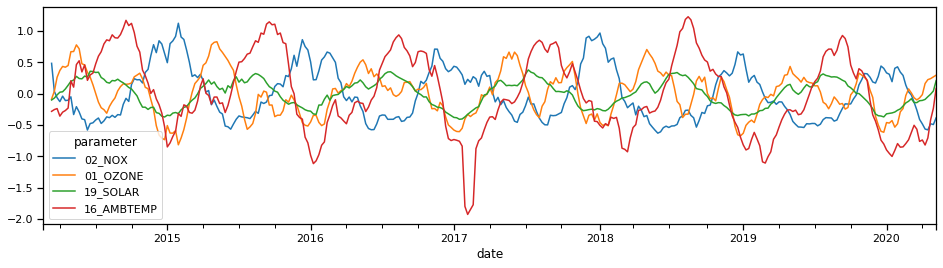

In [152]:
#t = km[km.parameter.isin(['01 OZONE PPM','02 NOX PPM','03 NO2 PPM','04 NO PPM'])]
t = km[['02_NOX','01_OZONE', '19_SOLAR','16_AMBTEMP']]

t= (t-t.mean())/(t.std())

fig, ax = plt.subplots(figsize=(16,4))
t.resample('W').mean().rolling(4).mean().plot(ax=ax)


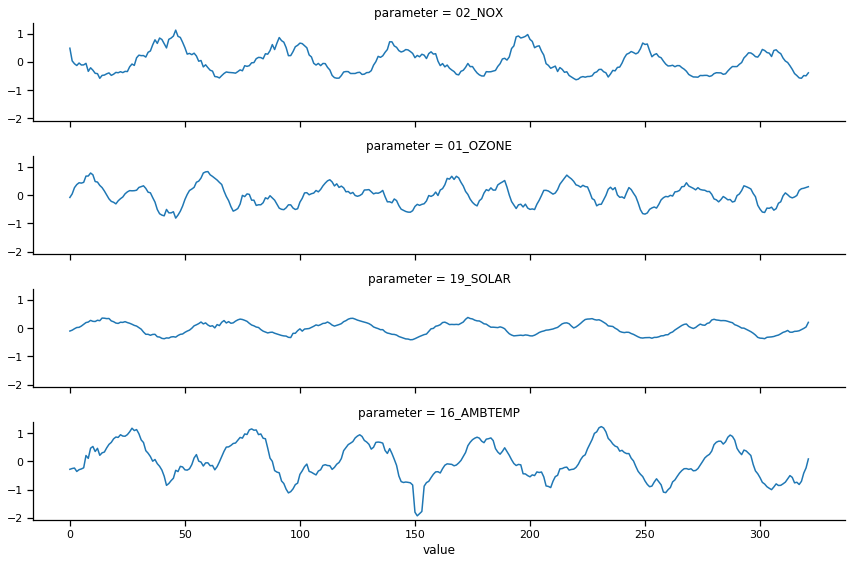

In [168]:

tp = t.resample('W').mean().rolling(4).mean().stack().to_frame()
tp.columns = ['value']
tp = tp.reset_index()

g = sns.FacetGrid(tp, row="parameter", height=2, aspect=6)
g = g.map(plt.plot, "value")

In [201]:
g.keys()

dict_keys(['ALPINE', 'CARMEL MT RCH', 'CHULA VISTA', 'CHULA_VI', 'DEL_MAR', 'DOWNTOWN', 'DOWNTOWN SES', 'EL CAJON FSD', 'EL CAJON LES', 'EL_CAJON', 'ESCONDIDO', 'KEARNY MESA', 'MIRAMAR', 'OTAY MESA', 'OTAY MESA DVN', 'OTAY_MES', 'PENDLETON', 'SAN YSIDRO'])

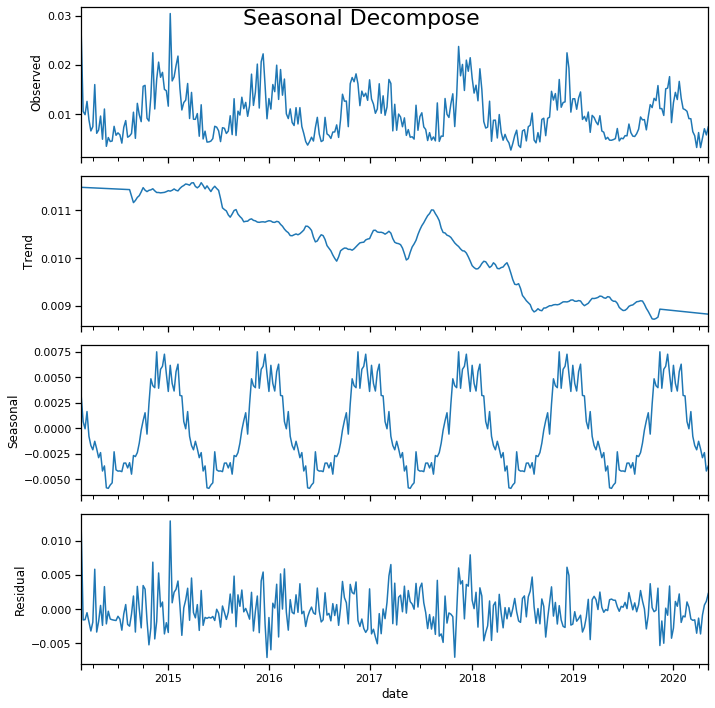

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

t = g['KEARNY MESA']['02_NOX'].resample('W').mean().dropna().copy()

sd = seasonal_decompose(t, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
sd.plot().suptitle('Seasonal Decompose', fontsize=22)

plt.show()

In [221]:
sd.resid.std()/ np.mean(sd.trend)

0.266402347739081

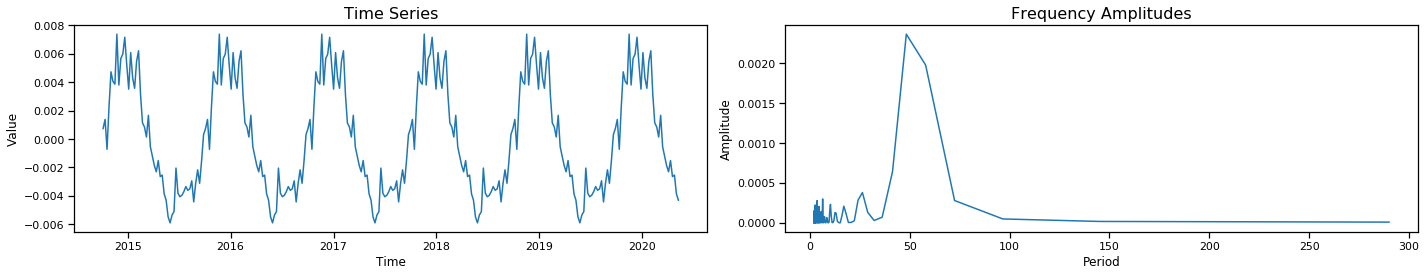

,freq,fft,amp
period,,,
48.0,0.020690,-0.284341-0.197799j,0.002364
58.0,0.017241,0.239481+0.163062j,0.001978
3.0,11.265517,-0.000211+0.001356j,0.001640
2.0,13.500000,0.000332+0.004338j,0.001013
4.0,4.562069,0.000068-0.001085j,0.000873
6.0,1.337931,-0.008827+0.017448j,0.000780
41.0,0.024138,0.076552+0.054698j,0.000642
5.0,2.420690,-0.000611+0.000712j,0.000557
10.0,0.300000,-0.007087+0.011377j,0.000390


In [91]:

def fft(s, N=None, T=1):

    import scipy.fftpack
    from scipy.signal.windows import hann
    
    if N is None:
        N = len(s)
    
    s = s * hann(len(s))
    
    yf = scipy.fftpack.fft(s)[:N//2]
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    amp = 2.0/N * np.abs(yf)
    
    df =   pd.DataFrame({'freq':xf, 'fft': yf, 'amp':amp})
    df['period'] = df.freq.rtruediv(1.0).replace([np.inf, -np.inf], np.nan)
    
    return df

def plot_fft(x,y,f):

    fig, ax = plt.subplots(1,2, figsize=(20,4))
    ax = ax.flat

    #fig.suptitle('FFT Analysis', fontsize=22)
    ax[0].plot(x,y)
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Value")
    ax[0].set_title('Time Series', fontsize=16)

    #ax[1].set_xlim(0,10)
    #ax[1].set_ylim(0,80)
    ax[1].plot(f.period, f.amp )
    ax[1].set_xlabel("Period")
    ax[1].set_ylabel("Amplitude")
    ax[1].set_title('Frequency Amplitudes', fontsize=16)

    plt.tight_layout()

    plt.show()

def sort_amp(y, f):
    t = f[f.period < len(y)/2].dropna().copy()
    t['period'] = f.period.round()
    t = t.groupby('period').sum().sort_values('amp', ascending=False)
    return t


t = km[km.parameter.isin(['01 OZONE PPM','02 NOX PPM'])]
t = t.set_index(['date','parameter'])['value'].unstack()
#t = t.resample('W').mean().rolling(4).mean().dropna().copy()
t = t.resample('W').mean().dropna().copy()


x = result_mul.seasonal.index.values
y = result_mul.seasonal.values

f = fft(y)

plot_fft(x,y,f)
    
display(HTML("<h2>Highest Apmplitude Periods"))


display(sort_amp(y, f).head(10))

(737425.0, 737546.0)

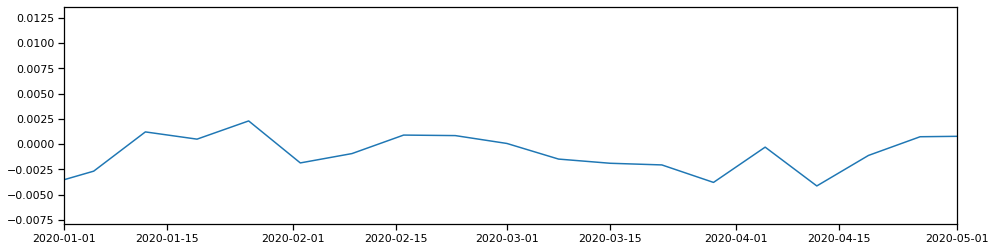

In [90]:
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(result_mul.resid)
ax.set_xlim('2020-01-01', '2020-05-01')

In [76]:
import statsmodels
statsmodels.__version__

'0.10.1'